# Digitale sinuser

Vi skal her se på hva som skjer når vi konverterer analoge
signaler til digitale

In [1]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

interactive(children=(FloatSlider(value=1.0, description='frekvens', max=5.0, min=0.25, step=0.25), IntSlider(…

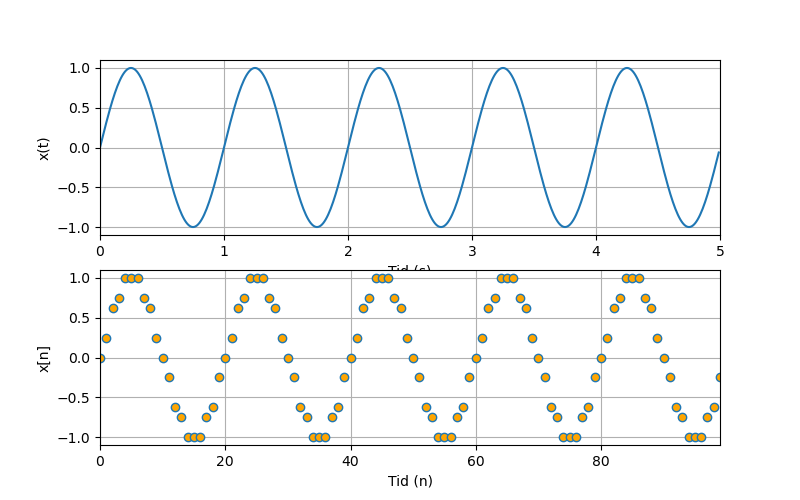

In [2]:
t_min = 0  # start (s)
t_max = 5  # slutt (s)


t = np.arange(t_min, t_max, 0.01)  # For kontinuerlig


fig, ax = plt.subplots(2, 1, figsize=[8, 5])

# For den kontinuerlige sinusen


def sin_cont(f=1, phi=0):
    return np.sin(f*t*2*np.pi+phi*np.pi/180)

# For den digitale sinusen


def sin_dig(f=1, fs=20, phi=0):
    N = np.arange(0, t_max*fs, 1)  # Akse for samples
    return N, np.around(np.sin(f*2*np.pi*N/fs+phi*np.pi/180)*8, 0)/8


line0, = ax[0].plot(t, sin_cont())

N, x_n = sin_dig()
line1, = ax[1].plot(N, x_n, 'o', markerfacecolor='orange')

# Oppsett av akser
ax[0].set_xlabel('Tid (s)')
ax[0].set_ylabel('x(t)')
ax[0].grid()
ax[0].set_xlim([0, t_max])

ax[1].set_xlabel('Tid (n)')
ax[1].set_ylabel('x[n]')
ax[1].grid()


# Funksjon for å oppdatere figuren


def update(frekvens=1, kvantisering=8, fs=20, phi=0):
    line0.set_ydata(sin_cont(frekvens, phi))

    N, x_n = sin_dig(frekvens, fs, phi)
    line1.set_ydata(np.around(x_n*kvantisering, 0)/kvantisering)
    line1.set_xdata(N)
    ax[1].set_xlim([0, np.max(N)])

    fig.canvas.draw_idle()


# Lag en interaktiv figur
i = interact(update, frekvens=(0.25, 5, 0.25), kvantisering=(
    2, 20, 1), ts=(2, 50, 2), phi=(0, 360, 30))

* `frekvens` er i Hz
* `kvantisering` er antall steg +1 mellom 0 og 1 i A/D
omformere. $(2\times \text{kvantisering}+1)$  så mange en  mellom -1 og 1.
Oppløsningen blir 1/`kvantisering`
* `ts` er samplingsfrekvensen i Hz
* `phi`er
faseskiftet i grader